# Data Preparation and Exploration

In [ ]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving amazone.csv to amazone.csv


In [ ]:
# Membaca Data Saham Amazone
data = pd.read_csv('amazone.csv')

# Preview 10 Baris Pertama Data Saham Amazone
data.head(10)

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-04-26 09:30:00-04:00,177.679993,178.029999,177.145004,177.145004,1870782,0.0,0.0
1,2024-04-26 09:31:00-04:00,177.116196,177.229996,176.515198,176.770004,333629,0.0,0.0
2,2024-04-26 09:32:00-04:00,176.820007,176.869995,176.244995,176.244995,225618,0.0,0.0
3,2024-04-26 09:33:00-04:00,176.244995,177.190002,176.220001,176.889999,231393,0.0,0.0
4,2024-04-26 09:34:00-04:00,176.910004,176.990005,176.509995,176.690002,250578,0.0,0.0
5,2024-04-26 09:35:00-04:00,176.669998,177.119995,176.500000,177.089996,220817,0.0,0.0
6,2024-04-26 09:36:00-04:00,177.110001,177.360001,176.970001,177.024902,214897,0.0,0.0
7,2024-04-26 09:37:00-04:00,177.050003,177.289993,176.889999,176.929993,182269,0.0,0.0
8,2024-04-26 09:38:00-04:00,176.929993,177.289993,176.850006,177.250000,155485,0.0,0.0
9,2024-04-26 09:39:00-04:00,177.199997,177.524994,177.199997,177.360001,142404,0.0,0.0


In [ ]:
# Informasi Tipe Data dan kolom Pada Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      389 non-null    object 
 1   Open          389 non-null    float64
 2   High          389 non-null    float64
 3   Low           389 non-null    float64
 4   Close         389 non-null    float64
 5   Volume        389 non-null    int64  
 6   Dividends     389 non-null    float64
 7   Stock Splits  389 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 24.4+ KB


In [ ]:
# Konversi tipe Kolom tanggal menjadi tipe datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Mencari Tanggal terlama pada data
harga_terendah = data[data['Close'] == data['Close'].min()]

# Menampilkan Data Tanggal Terlama pada data
print("harga terendah Pada Data :")
harga_terendah

harga terendah Pada Data :


,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
22,2024-04-26 09:52:00-04:00,176.610001,176.699997,176.179993,176.195007,178328,0.0,0.0


In [ ]:
# Mencari Tanggal terbaru pada data
harga_tertinggi = data[data['Close'] == data['Close'].max()]

# Menampilkan Data Tanggal Terbaru pada data
print("harga tertinggi Pada Data :")
harga_tertinggi

harga tertinggi Pada Data :


,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
209,2024-04-26 13:00:00-04:00,180.619995,180.820007,180.570007,180.729996,112970,0.0,0.0


In [ ]:
# Menampilkan ukuran data
print("Data Memiliki ukuran \n")
print("Baris : ", data.shape[0], " Kolom : ", data.shape[1])

Data Memiliki ukuran 

Baris :  389  Kolom :  8


Mencatat interval waktu per 1 menit selama 6 jam 30 menit
jumlah baris data = 6*60  + 30 = 390

Seharusnya terdapat 390 baris data

In [ ]:
# Prove
data['Datetime'] = pd.to_datetime(data['Datetime'])
df = data.copy()
df.set_index('Datetime', inplace=True)
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')
len(full_range)

390

In [ ]:
# Mengecek letak baris yang hilang
df_full = df.reindex(full_range)
df_full.reset_index(inplace=True)
df_full.rename(columns={'index': 'Datetime'}, inplace=True)

missing_timestamps = df_full[df_full.isnull().any(axis=1)]
missing_timestamps

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
126,2024-04-26 11:36:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ternyata baris yang memiliki datetime 11:36 tidak ada

In [ ]:
# Mengisi Kekosongan data pada timestamp '2024-04-26 11:36:00-04:00'
missing_row = pd.DataFrame({
    'Datetime': [pd.Timestamp('2024-04-26 11:36:00-04:00')],
    'Open': [None],
    'High': [None],
    'Low': [None],
    'Close': [None],
    'Volume': [None],
    'Dividends': [0.0],
    'Stock Splits': [0.0]
})

data = pd.concat([data, missing_row], ignore_index=True)
data = data.sort_values(by='Datetime').reset_index(drop=True)
data['Volume'] = data['Volume'].astype(float)

In [ ]:
data.isna().sum()

,0
Datetime,0
Open,1
High,1
Low,1
Close,1
Volume,1
Dividends,0
Stock Splits,0


In [ ]:
# fill missing value with interpolation
data[['Open', 'High', 'Low', 'Close', 'Volume']] = data[['Open', 'High', 'Low', 'Close', 'Volume']].interpolate()

In [ ]:
data.isna().sum()

,0
Datetime,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
# Mengecek Data Duplikat
print(f"Jumlah data duplikat: {data.duplicated().sum()}")

Jumlah data duplikat: 0


In [ ]:
# Hapus kolom yang tidak perlu
data = data.drop(columns=['Dividends'])
data = data.drop(columns=['Stock Splits'])
data.head(10)

,Datetime,Open,High,Low,Close,Volume
0,2024-04-26 09:30:00-04:00,177.679993,178.029999,177.145004,177.145004,1870782.0
1,2024-04-26 09:31:00-04:00,177.116196,177.229996,176.515198,176.770004,333629.0
2,2024-04-26 09:32:00-04:00,176.820007,176.869995,176.244995,176.244995,225618.0
3,2024-04-26 09:33:00-04:00,176.244995,177.190002,176.220001,176.889999,231393.0
4,2024-04-26 09:34:00-04:00,176.910004,176.990005,176.509995,176.690002,250578.0
5,2024-04-26 09:35:00-04:00,176.669998,177.119995,176.500000,177.089996,220817.0
6,2024-04-26 09:36:00-04:00,177.110001,177.360001,176.970001,177.024902,214897.0
7,2024-04-26 09:37:00-04:00,177.050003,177.289993,176.889999,176.929993,182269.0
8,2024-04-26 09:38:00-04:00,176.929993,177.289993,176.850006,177.250000,155485.0
9,2024-04-26 09:39:00-04:00,177.199997,177.524994,177.199997,177.360001,142404.0


In [ ]:
# Gambaran data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,390.0,179.083407,1.045427,176.240005,178.601456,179.342506,179.800381,1.807200e+02
High,390.0,179.168815,1.005219,176.520004,178.736698,179.394302,179.850006,1.808200e+02
Low,390.0,179.003510,1.075072,176.130005,178.526554,179.289993,179.759995,1.806300e+02
Close,390.0,179.087646,1.044424,176.195007,178.611252,179.360001,179.804218,1.807300e+02
Volume,390.0,95815.102564,116691.365105,22800.000000,53470.500000,73267.000000,105547.250000,1.870782e+06


In [ ]:
# Konversi kolom tanggal menjadi normal
data['Datetime'] = pd.to_datetime(data['Datetime']).dt.tz_localize(None)

In [ ]:
data

,Datetime,Open,High,Low,Close,Volume
0,2024-04-26 09:30:00,177.679993,178.029999,177.145004,177.145004,1870782.0
1,2024-04-26 09:31:00,177.116196,177.229996,176.515198,176.770004,333629.0
2,2024-04-26 09:32:00,176.820007,176.869995,176.244995,176.244995,225618.0
3,2024-04-26 09:33:00,176.244995,177.190002,176.220001,176.889999,231393.0
4,2024-04-26 09:34:00,176.910004,176.990005,176.509995,176.690002,250578.0
...,...,...,...,...,...,...
385,2024-04-26 15:55:00,179.679993,179.785004,179.619995,179.639999,148599.0
386,2024-04-26 15:56:00,179.639999,179.759995,179.619995,179.720001,133376.0
387,2024-04-26 15:57:00,179.729996,179.740005,179.639999,179.714996,169852.0
388,2024-04-26 15:58:00,179.720001,179.739807,179.679993,179.716202,282057.0


# Analisis Deskriptif

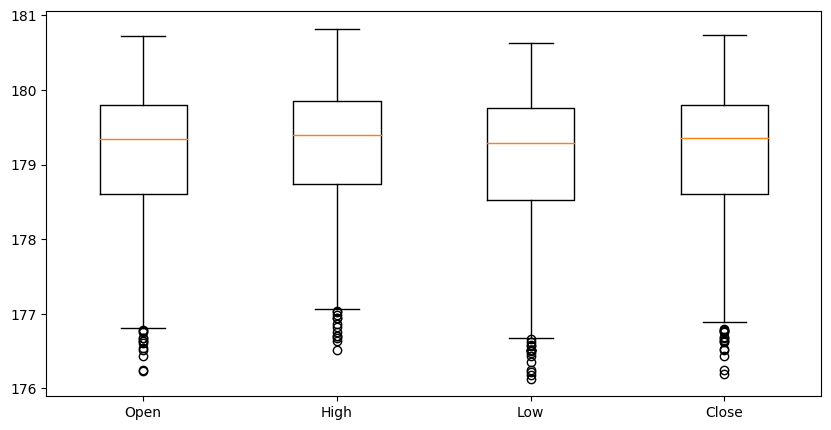

In [ ]:
# Plot sebaran data Open, High, Low, Close
plt.figure(figsize=(10,5))
plt.boxplot(data[['Open','High','Low','Close']])
new_labels = ['Open', 'High', 'Low', 'Close']
plt.xticks(ticks=[1, 2, 3, 4], labels=new_labels)
plt.show();

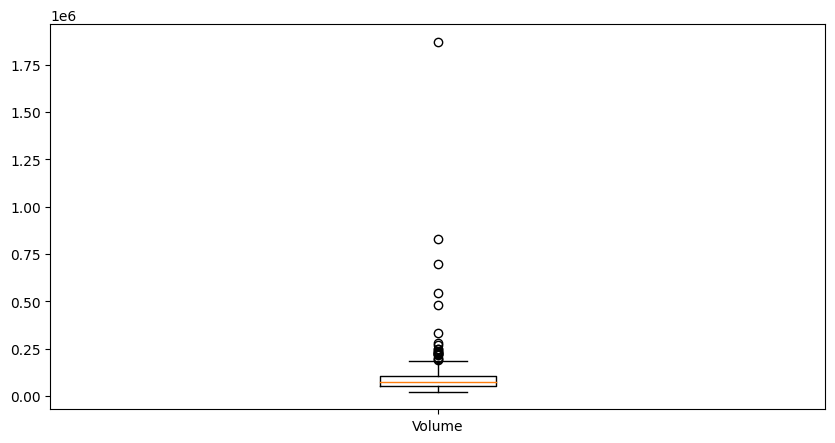

In [ ]:
# Plot sebaran data volume
plt.figure(figsize=(10,5))
plt.boxplot(data[['Volume']])
new_labels = ['Volume']
plt.xticks(ticks=[1], labels=new_labels)
plt.show();

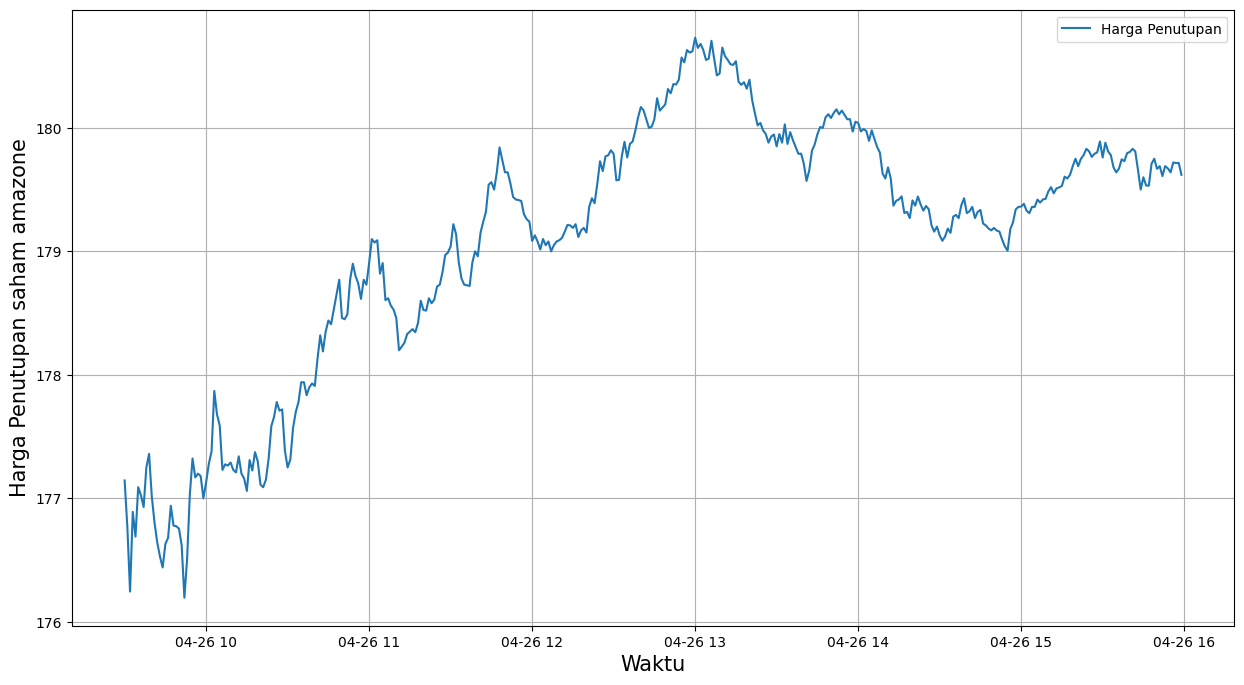

In [ ]:
# Plot harga penutupan
plt.figure(figsize = (15,8))
plt.grid(True)
p = sns.lineplot(x = "Datetime", y = "Close", data = data)
plt.legend(labels=["Harga Penutupan"])
p.set_xlabel("Waktu", fontsize = 15)
p.set_ylabel("Harga Penutupan saham amazone", fontsize = 15)
plt.show()

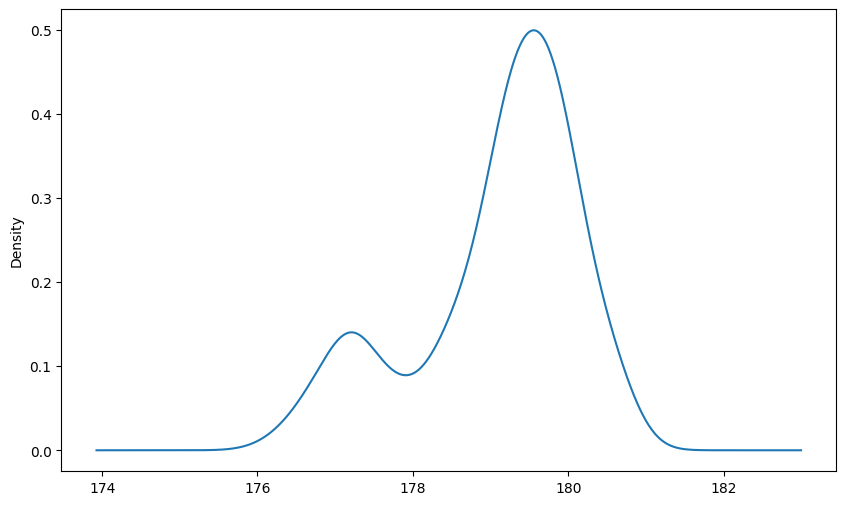

In [ ]:
# Distribusi Harga Penutupan
dclose = data['Close']

plt.figure(figsize=(10,6))
plt.grid(True)
dclose.plot(kind='kde')
plt.show()

Analisis Korelasi dan Multikolinearitas

In [ ]:
correlation_matrix = data[['Close', 'Open', 'High', 'Low', 'Volume']].corr()
correlation_matrix

,Close,Open,High,Low,Volume
Close,1.000000,0.992591,0.996329,0.997195,-0.225238
Open,0.992591,1.000000,0.996403,0.996781,-0.201227
High,0.996329,0.996403,1.000000,0.996022,-0.185318
Low,0.997195,0.996781,0.996022,1.000000,-0.227438
Volume,-0.225238,-0.201227,-0.185318,-0.227438,1.000000


### Data Splitting

In [ ]:
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

In [ ]:
train_size = int(len(data) * 0.8)
data_train, data_test = data[:train_size], data[train_size:]
X_data_train = data_train[['Open', 'High', 'Low', 'Volume']]
y_data_train = data_train['Close']
X_data_test = data_test[['Open', 'High', 'Low', 'Volume']]
y_data_test = data_test['Close']

In [ ]:
data_train

,Datetime,Open,High,Low,Close,Volume
0,2024-04-26 09:30:00,177.679993,178.029999,177.145004,177.145004,1870782.0
1,2024-04-26 09:31:00,177.116196,177.229996,176.515198,176.770004,333629.0
2,2024-04-26 09:32:00,176.820007,176.869995,176.244995,176.244995,225618.0
3,2024-04-26 09:33:00,176.244995,177.190002,176.220001,176.889999,231393.0
4,2024-04-26 09:34:00,176.910004,176.990005,176.509995,176.690002,250578.0
...,...,...,...,...,...,...
307,2024-04-26 14:37:00,179.294998,179.339996,179.259995,179.268799,33886.0
308,2024-04-26 14:38:00,179.279999,179.399902,179.274994,179.375000,28578.0
309,2024-04-26 14:39:00,179.380005,179.449997,179.369995,179.429993,48130.0
310,2024-04-26 14:40:00,179.429993,179.434998,179.304993,179.309998,76952.0


### Gaussian Process Regression

In [ ]:
# Coba GPR
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
model_gpr = gpr.fit(X_data_train, y_data_train)

In [ ]:
# GPR
predic_gpr_train = model_gpr.predict(X_data_train, return_cov=True)
predic_gpr = model_gpr.predict(X_data_test, return_cov=True)

In [ ]:
# Evaluate the data train from GPR model
rmse_gpr = np.sqrt(mean_squared_error(y_data_train, predic_gpr_train[0]))
mae_gpr = mean_absolute_error(y_data_train, predic_gpr_train[0])
mape_gpr = np.mean(np.abs((y_data_train - predic_gpr_train[0])/y_data_train)) * 100
r2_gpr = gpr.score(X_data_train, y_data_train)
print(f"RMSE: {rmse_gpr}")
print(f"MAE: {mae_gpr}")
print(f"MAPE: {mape_gpr}")
print(f"R-squared: {r2_gpr}")

RMSE: 0.06434044470251363
MAE: 0.04667561176495647
MAPE: 0.026152566618701925
R-squared: 0.9967750163108005


In [ ]:
# Evaluate the data test from GPR model
rmse_gpr = np.sqrt(mean_squared_error(y_data_test, predic_gpr[0]))
mae_gpr = mean_absolute_error(y_data_test, predic_gpr[0])
mape_gpr = np.mean(np.abs((y_data_test - predic_gpr[0])/y_data_test)) * 100
r2_gpr = gpr.score(X_data_test, y_data_test)
print(f"RMSE: {rmse_gpr}")
print(f"MAE: {mae_gpr}")
print(f"MAPE: {mape_gpr}")
print(f"R-squared: {r2_gpr}")

RMSE: 0.041686329899179225
MAE: 0.03016521991827549
MAPE: 0.016801919466356695
R-squared: 0.966576557409945


In [ ]:
# Get the parameter
param_gpr = model_gpr.kernel_.get_params()
param_gpr

{'k1': DotProduct(sigma_0=1),
 'k2': WhiteKernel(noise_level=1),
 'k1__sigma_0': 1.0,
 'k1__sigma_0_bounds': (1e-05, 100000.0),
 'k2__noise_level': 1.0,
 'k2__noise_level_bounds': (1e-05, 100000.0)}

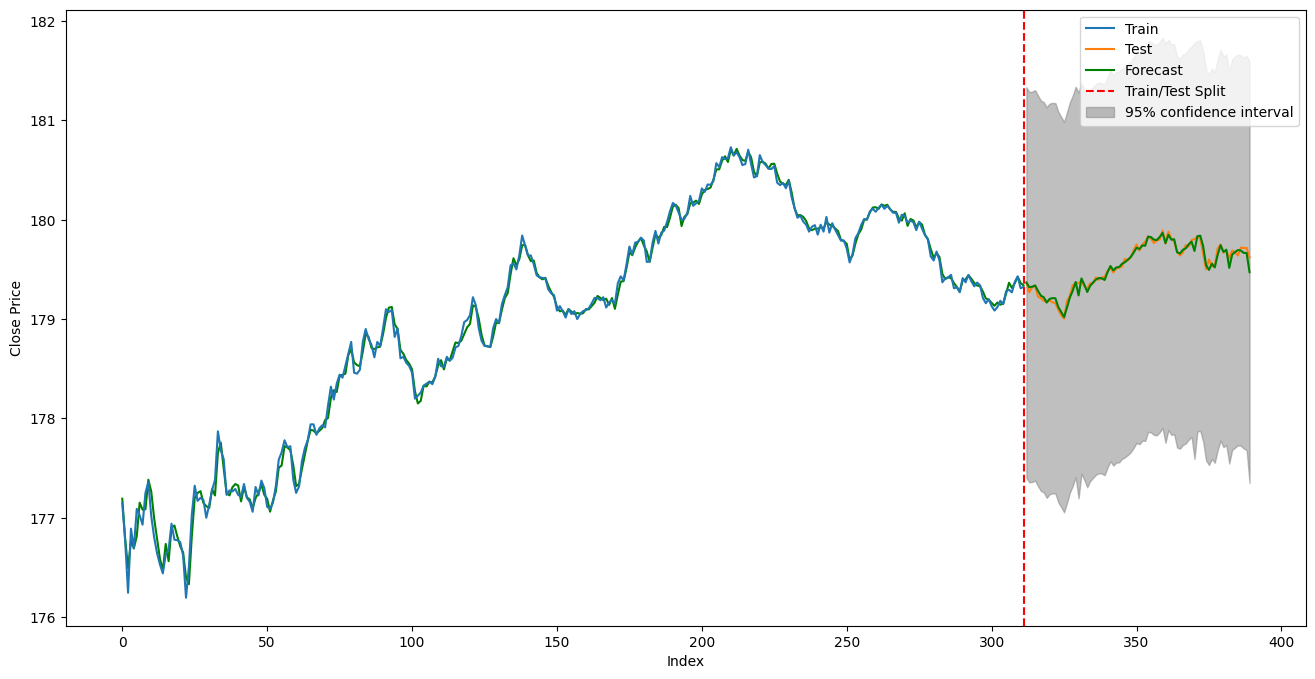

In [ ]:
# Plot the forecast against actual values
ba = predic_gpr[0] - 1.96*np.sqrt(np.diag(predic_gpr[1]))
bb = predic_gpr[0] + 1.96*np.sqrt(np.diag(predic_gpr[1]))
plt.figure(figsize=(16, 8))
plt.plot(data_train.index, predic_gpr_train[0], color='g')
plt.plot(data_train.index, y_data_train, label='Train')
plt.plot(data_test.index, y_data_test, label='Test')
plt.plot(data_test.index, predic_gpr[0], label='Forecast', color='g')
# plt.title('Amazon Stock Price Forecast using GPR')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.axvline(x=data_train.index[-1], color='red', linestyle='--', label='Train/Test Split')
plt.fill_between(data_test.index, ba, bb, alpha=0.5, label=r"95% confidence interval", color='gray')
plt.legend()
plt.show()

In [ ]:
# Optimisasi Grid Search
gpr_grid = GaussianProcessRegressor(random_state=0)
param_grid = {'kernel' : [DotProduct(sigma_0=j) + WhiteKernel()
                for j in [0.1, 1, 10]],
              'alpha' : [1e-2, 1e-3, 1e-4]}
grid_search_gpr = GridSearchCV(gpr_grid, param_grid, cv=5)
pred_grid_gp = grid_search_gpr.fit(X_data_train, y_data_train)
best_model = grid_search_gpr.best_estimator_

predic_gpr_train_grid = best_model.predict(X_data_train, return_cov=True)

predic_gpr_grid = best_model.predict(X_data_test, return_cov=True)

In [ ]:
# Evaluate the data train from grid search optimization
rmse_gpr_grid = np.sqrt(mean_squared_error(y_data_train, predic_gpr_train_grid[0]))
mae_gpr_grid = mean_absolute_error(y_data_train, predic_gpr_train_grid[0])
mape_gpr_grid = np.mean(np.abs((y_data_train - predic_gpr_train_grid[0])/y_data_train)) * 100
r2_gpr_grid = best_model.score(X_data_train, y_data_train)

print(f"RMSE: {rmse_gpr_grid}")
print(f"MAE: {mae_gpr_grid}")
print(f"MAPE: {mape_gpr_grid}")
print(f"R-squared: {r2_gpr_grid}")

RMSE: 0.05613421531865539
MAE: 0.040790680127266034
MAPE: 0.0228600291871423
R-squared: 0.9975452078929351


In [ ]:
# Evaluate the data test from grid search optimization
rmse_gpr_grid = np.sqrt(mean_squared_error(y_data_test, predic_gpr_grid[0]))
mae_gpr_grid = mean_absolute_error(y_data_test, predic_gpr_grid[0])
mape_gpr_grid = np.mean(np.abs((y_data_test - predic_gpr_grid[0])/y_data_test)) * 100
r2_gpr_grid = best_model.score(X_data_test, y_data_test)

print(f"RMSE: {rmse_gpr_grid}")
print(f"MAE: {mae_gpr_grid}")
print(f"MAPE: {mape_gpr_grid}")
print(f"R-squared: {r2_gpr_grid}")

RMSE: 0.04094442651575103
MAE: 0.028763795510316506
MAPE: 0.01602105938868691
R-squared: 0.9677556636497006


In [ ]:
# Get the parameter
param_gpr_grid = best_model.kernel_.get_params()
param_gpr_grid

{'k1': DotProduct(sigma_0=0.273),
 'k2': WhiteKernel(noise_level=0.00221),
 'k1__sigma_0': 0.2726155195006297,
 'k1__sigma_0_bounds': (1e-05, 100000.0),
 'k2__noise_level': 0.002211566566462812,
 'k2__noise_level_bounds': (1e-05, 100000.0)}

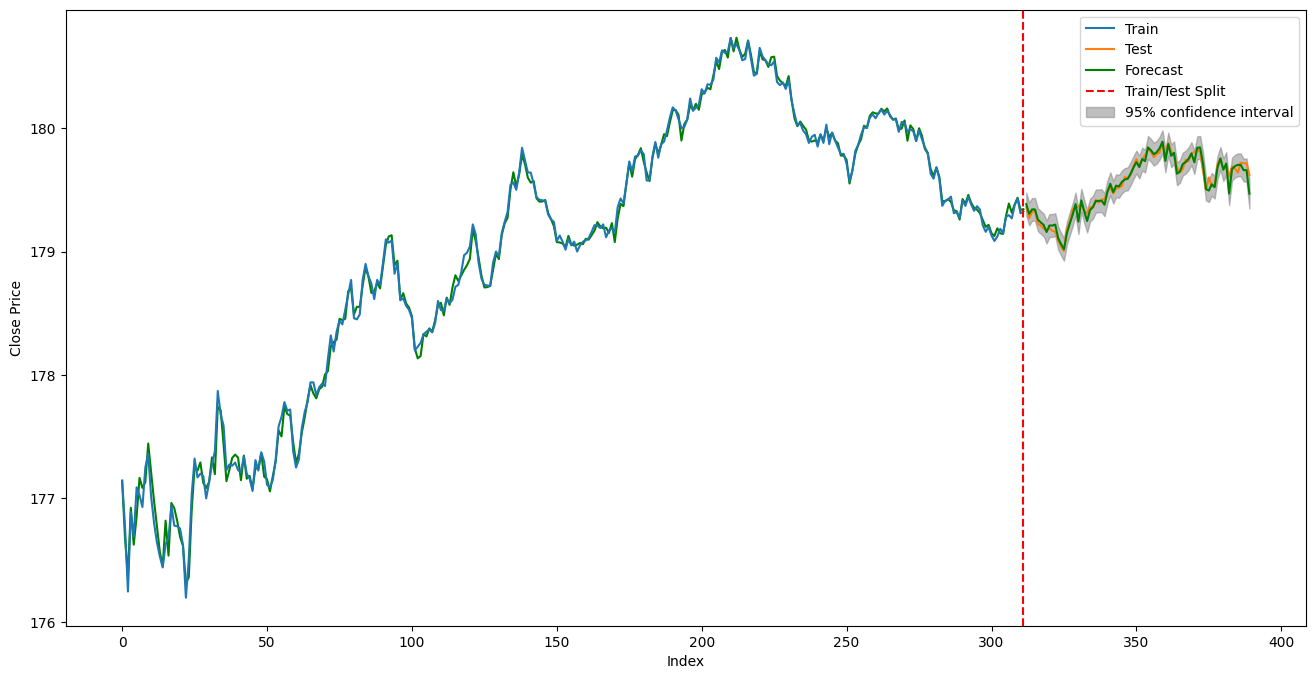

In [ ]:
# Plot the forecast against actual values
bag = predic_gpr_grid[0] - 1.96*np.sqrt(np.diag(predic_gpr_grid[1]))
bbg = predic_gpr_grid[0] + 1.96*np.sqrt(np.diag(predic_gpr_grid[1]))
plt.figure(figsize=(16, 8))
plt.plot(data_train.index, predic_gpr_train_grid[0], color='g')
plt.plot(data_train.index, y_data_train, label='Train')
plt.plot(data_test.index, y_data_test, label='Test')
plt.plot(data_test.index, predic_gpr_grid[0], label='Forecast', color='g')
# plt.title('Amazon Stock Price Forecast using GPR (Grid Search)')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.axvline(x=data_train.index[-1], color='red', linestyle='--', label='Train/Test Split')
plt.fill_between(data_test.index, bag, bbg, alpha=0.5, label=r"95% confidence interval", color = 'gray')
plt.legend()
plt.show()

In [ ]:
# Buat batas atas dan batas bawah interval kepercayaan menjadi array
bag_train = predic_gpr_train_grid[0] - 1.96*np.sqrt(np.diag(predic_gpr_train_grid[1]))
bbg_train = predic_gpr_train_grid[0] + 1.96*np.sqrt(np.diag(predic_gpr_train_grid[1]))

In [ ]:
# Menggabungkan hasil prediksi data train dan data test
data['GPR_GRID_BA'] = np.concatenate([bag_train, bag])
data['GPR_GRID'] = np.concatenate([predic_gpr_train_grid[0], predic_gpr_grid[0]])
data['GPR_GRID_BB'] = np.concatenate([bbg_train, bbg])

In [ ]:
data.head()

,Datetime,Open,High,Low,Close,Volume,GPR_GRID_BA,GPR_GRID,GPR_GRID_BB
0,2024-04-26 09:30:00,177.679993,178.029999,177.145004,177.145004,1870782.0,177.003666,177.140625,177.277584
1,2024-04-26 09:31:00,177.116196,177.229996,176.515198,176.770004,333629.0,176.570882,176.671875,176.772868
2,2024-04-26 09:32:00,176.820007,176.869995,176.244995,176.244995,225618.0,176.273811,176.373047,176.472283
3,2024-04-26 09:33:00,176.244995,177.190002,176.220001,176.889999,231393.0,176.816231,176.923828,177.031425
4,2024-04-26 09:34:00,176.910004,176.990005,176.509995,176.690002,250578.0,176.529988,176.625000,176.720012


In [ ]:
# Export csv hasil prediksi
data.to_csv('Prediksi Final Saham Amazon.csv')